In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import os 

sys.path.append('..')
from src import config

if sys.platform == 'linux':
    path = config.LINUX_PATH
else:
    path = config.OS_PATH
os.chdir(path)

In [3]:
data_path = config.STRAVA_TRAIN_PATH
data = pd.read_csv(data_path, index_col=0)
print(data.columns)
data.head()

Index(['name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'workout_type', 'timezone', 'start_latlng',
       'end_latlng', 'achievement_count', 'kudos_count', 'comment_count',
       'athlete_count', 'photo_count', 'manual', 'average_speed', 'max_speed',
       'average_heartrate', 'max_heartrate', 'pr_count', 'total_photo_count',
       'suffer_score', 'date', 'time'],
      dtype='object')


,name,distance,moving_time,elapsed_time,total_elevation_gain,workout_type,timezone,start_latlng,end_latlng,achievement_count,...,manual,average_speed,max_speed,average_heartrate,max_heartrate,pr_count,total_photo_count,suffer_score,date,time
260,Pre meet,7196.0,1703.0,1718.0,3.0,3.0,America/Boise,"[43.609586, -116.191655]","[43.609905, -116.191738]",0.0,...,False,4.225,8.6,148.7,173.0,0.0,0.0,16.0,2021-01-29,21:51:05
261,WU,4844.8,1331.0,1359.0,44.0,0.0,America/Boise,"[43.610201, -116.191848]","[43.610297, -116.191757]",0.0,...,False,3.640,4.9,151.0,167.0,0.0,0.0,20.0,2021-01-29,21:08:46
262,Gain train 🚂😈🤪,8135.4,2166.0,2270.0,10.0,0.0,America/Boise,"[43.599624, -116.190932]","[43.599651, -116.192177]",0.0,...,False,3.756,5.3,148.2,164.0,0.0,0.0,26.0,2021-01-29,16:01:32
263,"Not 10, sorry Logan",12927.7,3557.0,3748.0,49.0,0.0,America/Boise,"[43.610229, -116.191785]","[43.610286, -116.191725]",2.0,...,False,3.634,5.5,150.2,165.0,0.0,0.0,52.0,2021-01-28,22:39:54
264,😴,6783.4,1817.0,1817.0,9.0,0.0,America/Boise,"[43.599342, -116.190412]","[43.599663, -116.190929]",0.0,...,False,3.733,7.6,153.4,165.0,0.0,0.0,29.0,2021-01-28,14:13:57


In [4]:
from pycaret.regression import *

data_path = config.STRAVA_TRAIN_PATH
data = pd.read_csv(data_path, index_col=0)
data = data.drop(['name','start_latlng', 'end_latlng'], axis=1)
reg = setup(data, target='kudos_count')
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.1328,112.1575,10.2927,0.8226,0.5111,0.3587,0.0590
gbr,Gradient Boosting Regressor,7.4053,124.3399,10.9439,0.8112,0.5313,0.3781,0.0250
ridge,Ridge Regression,7.9663,123.5741,11.0265,0.8070,0.5967,0.4402,0.0040
lr,Linear Regression,8.0824,124.3188,11.0674,0.8045,0.5897,0.4430,0.1800
br,Bayesian Ridge,8.0356,131.0520,11.3499,0.7977,0.5934,0.4422,0.0030
omp,Orthogonal Matching Pursuit,8.2836,132.5400,11.4005,0.7882,0.5758,0.4452,0.0030
rf,Random Forest Regressor,7.4806,140.6803,11.6004,0.7848,0.5435,0.3828,0.0720
ada,AdaBoost Regressor,9.6543,142.3383,11.8180,0.7751,0.6047,0.5333,0.0180
lightgbm,Light Gradient Boosting Machine,8.3678,177.8141,13.1229,0.7370,0.5514,0.3815,0.0110
lasso,Lasso Regression,9.5827,211.5485,14.2586,0.6861,0.6251,0.5169,0.0780


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5297, verbose=0, warm_start=False)

In [14]:
model = create_model('et')
tuned_model = tune_model(model)
model_final = finalize_model(tuned_model)
save_model(model_final, 'models/kudos_initial')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.3998,74.2895,8.6191,0.8851,0.4176,0.2250
1,6.4648,75.8488,8.7091,0.8728,0.3609,0.2116
2,6.5143,85.4909,9.2461,0.8931,0.2283,0.1951
3,10.0869,204.8845,14.3138,0.6135,0.7545,0.2561
4,7.4262,103.0581,10.1518,0.8223,0.6311,0.7150
5,6.2794,90.9781,9.5382,0.7766,0.5658,0.1600
6,10.3428,290.3408,17.0394,0.6786,0.6042,0.3677
7,7.3199,102.2158,10.1102,0.8370,0.5500,0.6511
8,5.6776,79.3194,8.9061,0.9164,0.3595,0.1985
9,7.1445,128.5105,11.3362,0.8253,0.6325,0.5119


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='kudos_count', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=11,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min

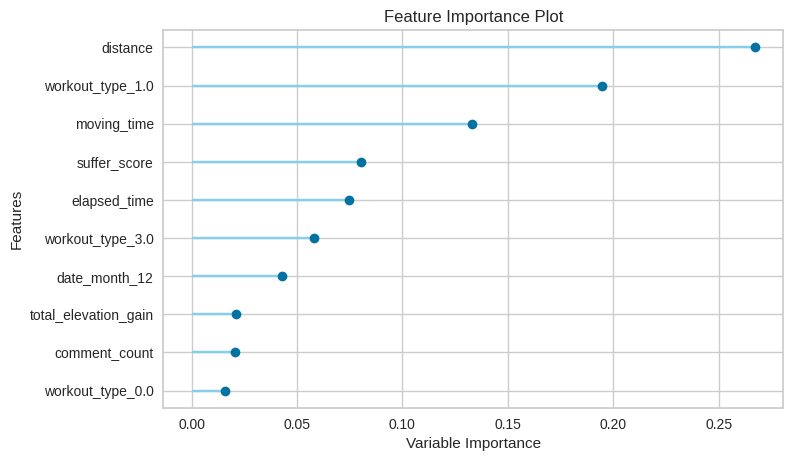

In [18]:
plot_model(tuned_model)
interpret_model(tuned_model)
plot_model(tuned_model, plot='feature')

In [27]:
data_path = config.STRAVA_TEST_PATH
data_unseen = pd.read_csv(data_path, index_col=0)
predictions = predict_model(tuned_model, data=data_unseen)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions.kudos_count.values, predictions.Label.values)
rmse = mean_squared_error(predictions.kudos_count.values, predictions.Label.values, squared=False)
print(f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}')

MSE: 146.96
RMSE: 12.12
